In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

invoices = pd.read_csv('/Users/aisleykeith/Downloads/invoices.csv')
customers = pd.read_json('/Users/aisleykeith/Downloads/customers.json')

In [8]:
# Easy 1
# How many unique customers are in the dataset?
unique_customers = customers['id'].nunique()
unique_customers

5191

In [9]:
# Easy 2
# What are the different categories of products available? How many unique categories are there?
categories = invoices['category'].unique()
num_categories = len(categories)

print("Product Categories:")
print(categories)

print(f"\nUnique Categories: {num_categories}")

Product Categories:
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']

Unique Categories: 8


In [10]:
# Easy 3
# Which payment method is the most popular? How many times was it used?
most_popular_payment = invoices['payment_method'].value_counts().idxmax()
payment_count = invoices['payment_method'].value_counts().max()
most_popular_payment, payment_count

('Cash', 44447)

In [11]:
# Medium 1
# What are the three most popular categories, by total sales?
invoices['total_price'] = invoices['price'] * invoices['quantity']
top_categories = invoices.groupby('category')['total_price'].sum().sort_values(ascending=False).head(3)
top_categories

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_price, dtype: float64

In [12]:
# Medium 2
# What are the total sales attributed to customers over the age of 45?
merged = pd.merge(invoices, customers, left_on='customer_id', right_on='id')

sales_over_45 = merged[merged['age'] > 45]['total_price'].sum()
sales_over_45

82039768.15

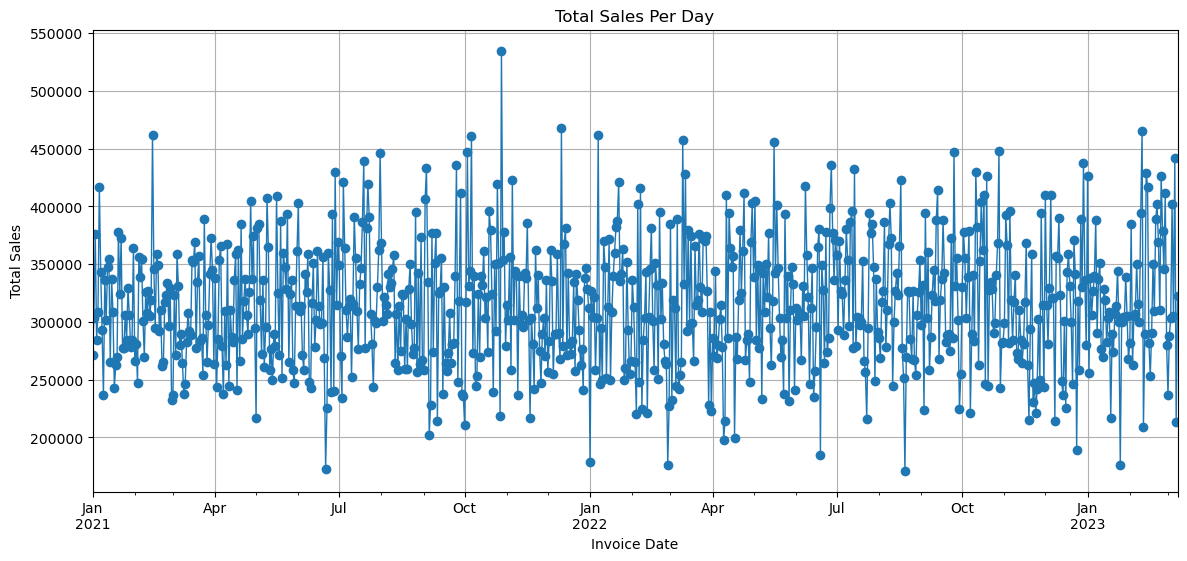

In [13]:
# Medium 3
# How is the data distributed across different invoice dates? Are there any seasonal trends or patterns?
invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], dayfirst=True, errors='coerce')

invoices['total_price'] = invoices['price'] * invoices['quantity']

daily_sales = invoices.groupby('invoice_date')['total_price'].sum()

daily_sales.plot(kind='line', figsize=(14, 6), marker='o', linewidth=1)
plt.title("Total Sales Per Day")
plt.xlabel("Invoice Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [14]:
# Hard 1
# Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

invoices = pd.read_csv('/Users/aisleykeith/Downloads/invoices.csv')
customers = pd.read_json('/Users/aisleykeith/Downloads/customers.json')

invoices['total_price'] = invoices['price'] * invoices['quantity']

merged = pd.merge(invoices, customers, left_on='customer_id', right_on='id')

merged['age_group'] = (merged['age'] // 10) * 10
merged['age_range'] = merged['age_group'].astype(str) + '-' + (merged['age_group'] + 9).astype(str)

grouped = merged.groupby(['category', 'age_range'])['total_price'].sum().reset_index()

grouped.rename(columns={'total_price': 'total_sales'}, inplace=True)

grouped.sort_values(by=['category', 'age_range'], inplace=True)

grouped

,category,age_range,total_sales
0,Books,10.0-19.0,12801.75
1,Books,20.0-29.0,79461.75
2,Books,30.0-39.0,84143.10
3,Books,40.0-49.0,87203.40
4,Books,50.0-59.0,74962.20
...,...,...,...
67,Toys,50.0-59.0,345067.52
68,Toys,60.0-69.0,363955.20
69,Toys,70.0-79.0,273244.16
70,Toys,80.0-89.0,153932.80
